<a href="https://colab.research.google.com/github/ktichola/ML-and-DL-to-Gravitational-waves-analysis/blob/main/%E2%AD%90%E2%9C%A8Binary_Classification_with_a_Pulsar_stars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'playground-series-s3e10:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F47789%2F5148345%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240505%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240505T090422Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D891f60ff632dfa2fb76ff3fc671e7dbca41f4dc45f02867e07acc67c53cfad6d75cb3c1980ddb12961fe3f7cb31d9bea9f7e7e7830eb5e1673756869e6b4895a1568f487deed7c7da12e1f0f550f69969ad56d00b63eec7623938cf5b1f44646603f18042b352e0d0f915f82d92431377ede8329b123a79e2e4639b111f8548a7e49478cf6b02c61c30fce9da3d16aaac4b56fa49ce4df23871599c336ce63594aa192a7705ff7e779df45b67aaa95c0afbaf19a4e7e9f202ab615670afbd982c0a47786dbdf42982fd13ac24282d4079f4154e6ab41021491761617d4158e5cf6edf0c50461158ccc841275665b0f22c8b76d336f60442295e2f11078439c42,bitcoin:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3324307%2F5786017%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240505%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240505T090422Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D6e55590db3d02f6364bfd4f4f0f7e2e6ab9e0aaa9f6c79e735ff95f3fd1dc6400e9f6940f96073f95ba653113ec3014d31af74d8a6b490a50fe6f75832f5d00c7e09e1eef2defabe6eeacc63afda8ce431d6091e77883746ef13f681c2a3362e4f2f13b05e438ba0000d95ac4bcbc5ed1a6161f2612ffd56696b3fbac225a164fd516e529d9a17cf763eb03c7f0ea750932785ae71dcd00f52e7ea4e2aebe5f3c2e9a2d01dec49b4aa6ebb497ecce45fccfa90dd589880ec8b73b11abad476e99c6ddd7b4d2c94c6a5fffe0625133a8a5163f44b5eccf1871b88e1c177aedc5f677c18ae419f8a44ad430795c5ba9d74638fb73c12b5e88eb85dea4467aa94b0,biggan/tensorflow1/256/2:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-models-data%2F179%2F272%2Fbundle%2Farchive.tar.gz%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240505%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240505T090422Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D2ca696d1c8eb8ea25b82dfa8b2bed6cc4a45d6869eea1542ec30ea2709e5bf6c0496c4783c3d7a65fa7ea423e1cfbd5daa7e3f24fe112733d6f5ad7c7428a99213712ec454f02af64a6139fd9eaa943e0766af8697e01a36b7f7a72e19cea97d5cff038e4cad1ccfe107f4fa345e78dfe91e25223aa52f0f7578437f3e4bf2439f49f3197022b95c290e4d847d97a76bad9dd8d8ddb4585482bd95e9a93e8f9c51510e6a5a31a0aea28f0fd9f719e188332b1fc8891de5356de8a55869318455dd49d73ab420fcacdb184b0573d49b26a3c85a998e66e04a67b75c1a0129c804e21ee47e985fc71a79524bfa69774b5236ec2e875c8326cbea3aa41831f66082,soundstream/tensorflow2/mel-decoder-music/1:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-models-data%2F1218%2F1445%2Fbundle%2Farchive.tar.gz%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240505%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240505T090422Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D53e28207b87b9f2c0be7cb47f4e99ad75c8766358c1de0328c718e32f6f2e6d382cdf1577f05c5a689f83d39b6b8516ffeb39245ad8b2a35b1252471532a51db76e288aea06469d0b27e29f66654d0b0d51164dc6d62f63ee50bcb2ed0439cd432603461f02fbdd7aac553f66ce2327e187c5eaf3bf8e19babc6a1215e30903debd324d094c8bf4512582ec9fa98347a21d8c0b2199bf3e8d22a593143c610ebf94661ed5ede2d299288609b4f031ff7091f7327312a619213c2b753c5ef24c437d2ab26db07b8830dc4d445bab752abb8b3e70a4f6575604c1a1656b7b8441f54a67cecea2a7d5d703c670ccaac8ed115121377565dcf278f49866cb6f5a9c5'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


<div style="padding:20px;
            color:white;
            margin:10;
            font-size:200%;
            text-align:center;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">Binary Classification with a Pulsar stars</div>

<a id="toc"></a>
- [1. Import libraries](#1)
- [2. Load Data](#2)
- [3. EDA](#3)
- [4. Correlation](#4)
- [5. Model building](#5)
- [6. Submitting](#6)

<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> Introduction</div>


<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
<ul>
Pulsars are spherical, compact objects that are about the size of a large city but contain more mass than the sun. Scientists are using pulsars to study extreme states of matter, search for planets beyond Earth’s solar system and measure cosmic distances. Pulsars also could help scientists find gravitational waves, which could point the way to energetic cosmic events like collisions between super massive black holes. Discovered in 1967, pulsars are fascinating members of the cosmic community.
Pulsars radiate two steady, narrow beams of light in opposite directions. Although the light from the beam is steady, pulsars appear to flicker because they also spin. It’s the same reason a lighthouse appears to blink when seen by a sailor on the ocean: As the pulsar rotates, the beam of light may sweep across the Earth, then swing out of view, then swing back around again. To an astronomer on the ground, the light goes in and out of view, giving the impression that the pulsar is blinking on and off. The reason a pulsar’s light beam spins around like a lighthouse beam is that the pulsar’s beam of light is typically not aligned with the pulsar’s axis of rotation.
Each pulsar produces a slightly different emission pattern, which varies slightly with each rotation . Thus a potential signal detection known as a ‘candidate’, is averaged over many rotations of the pulsar, as determined by the length of an observation. In the absence of additional info, each candidate could potentially describe a real pulsar. However in practice almost all detection are caused by radio frequency interference (RFI) and noise, making legitimate signals hard to find.
Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. Classification systems in particular are being widely adopted, which treat the candidate data sets as binary classification problems.
</ul>
</div>

![](https://storage.googleapis.com/kaggle-datasets-images/1090054/1833828/99a39218f65e59fc7fe192e563ba6617/dataset-card.jpg?t=2021-01-10-19-59-13)

![](https://thelastdialogue.org/wp-content/uploads/2019/09/Pulsar-Rotating.gif)


<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
<ul>
Our problem calls for deploying Classification algorithms. Briefly, Classification either predicts categorical class labels or classifies data (construct a model) based on the training set and the values (class labels) in classifying attributes and uses it in classifying new data. There are a number of classification models. Classification models include logistic regression, decision tree, random forest, gradient-boosted tree, multi-layer perceptron, one-vs-rest, and Naive Bayes.
</ul>
</div>

<a id="1"></a>
## <b>1 <span style='color:red'>Import libraries</span></b>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import seaborn as sns
import gc
import re as re
from collections import Counter

from tqdm.auto import tqdm
import math
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

import time
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
%matplotlib inline
tqdm.pandas()
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor
from sklearn.metrics import roc_auc_score
from sklearn import metrics

<a id="2"></a>
## <b>2 <span style='color:red'>Load data</span></b>

In [ ]:

train = pd.read_csv('/kaggle/input/playground-series-s3e10/train.csv')
test  = pd.read_csv('/kaggle/input/playground-series-s3e10/test.csv')
sample=pd.read_csv('/kaggle/input/playground-series-s3e10/sample_submission.csv')

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
<ul>Each row lists the variables first, and the class label is the final entry. The class labels used are 0 (negative) and 1 (positive). Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile (folded profile). This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency . The remaining four variables are similarly obtained from the DM-SNR curve . These are summarized below:
<li>Mean of the integrated profile.
<li>Standard deviation of the integrated profile.
<li>Excess kurtosis of the integrated profile.
<li>Skewness of the integrated profile.
<li>Mean of the DM-SNR curve
<li>Standard deviation of the DM-SNR curve.
<li>Excess kurtosis of the DM-SNR curve.
<li>Skewness of the DM-SNR curve.
<li>Class
</ul>
</div>

In [ ]:
train.head()

,id,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
0,0,133.171875,59.716081,0.043133,-0.703383,54.917224,70.084438,0.749798,-0.649512,0
1,1,87.093750,36.257973,0.435469,2.266057,3.417224,21.865069,7.039330,52.686251,0
2,2,112.640625,39.818393,0.379639,0.922306,2.730769,15.689690,8.193471,85.649785,0
3,3,120.679688,45.918448,-0.098490,0.011775,2.696488,20.954662,8.183874,70.332899,0
4,4,134.070312,57.720107,-0.107772,-0.573335,1.107860,11.255051,16.107748,308.753765,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117564 entries, 0 to 117563
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    117564 non-null  int64  
 1   Mean_Integrated       117564 non-null  float64
 2   SD                    117564 non-null  float64
 3   EK                    117564 non-null  float64
 4   Skewness              117564 non-null  float64
 5   Mean_DMSNR_Curve      117564 non-null  float64
 6   SD_DMSNR_Curve        117564 non-null  float64
 7   EK_DMSNR_Curve        117564 non-null  float64
 8   Skewness_DMSNR_Curve  117564 non-null  float64
 9   Class                 117564 non-null  int64  
dtypes: float64(8), int64(2)
memory usage: 9.0 MB


In [ ]:
train.shape

(117564, 10)

In [ ]:
test.head()

,id,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve
0,117564,140.046875,54.507800,0.058862,-0.567263,2.337793,14.868335,9.591760,117.988781
1,117565,107.828125,51.578965,0.284368,-0.338430,1.574415,12.501437,11.694968,182.704822
2,117566,135.062500,49.812343,-0.087784,-0.094341,3.576923,21.243336,7.252386,59.021499
3,117567,112.812500,41.926647,0.519921,1.287762,6.669732,29.013153,5.097661,27.105240
4,117568,96.210938,35.322620,0.481286,2.443080,2.218227,17.041064,9.766006,117.131775


<a id="3"></a>
## <b>3 <span style='color:red'>EDA</span></b>

In [ ]:
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values * 100
    summ['%missing'] = df.isnull().sum().values / len(df)
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['first value'] = df.loc[0].values
    summ['second value'] = df.loc[1].values
    summ['third value'] = df.loc[2].values

    return summ

In [ ]:
summary(train)

data shape: (117564, 10)


,data type,#missing,%missing,#unique,min,max,first value,second value,third value
id,int64,0,0.0,117564,0.000000,117563.000000,0.000000,1.000000,2.000000
Mean_Integrated,float64,0,0.0,11065,6.054688,189.367188,133.171875,87.093750,112.640625
SD,float64,0,0.0,49262,24.783273,93.602933,59.716081,36.257973,39.818393
EK,float64,0,0.0,37132,-1.730782,7.879628,0.043133,0.435469,0.379639
Skewness,float64,0,0.0,41366,-1.791886,65.385974,-0.703383,2.266057,0.922306
Mean_DMSNR_Curve,float64,0,0.0,12474,0.213211,217.371238,54.917224,3.417224,2.730769
SD_DMSNR_Curve,float64,0,0.0,48050,7.370432,109.890785,70.084438,21.865069,15.689690
EK_DMSNR_Curve,float64,0,0.0,42870,-2.597872,34.539844,0.749798,7.039330,8.193471
Skewness_DMSNR_Curve,float64,0,0.0,50648,-1.976976,1191.000837,-0.649512,52.686251,85.649785
Class,int64,0,0.0,2,0.000000,1.000000,0.000000,0.000000,0.000000


In [ ]:
summary(test)

data shape: (78377, 9)


,data type,#missing,%missing,#unique,min,max,first value,second value,third value
id,int64,0,0.0,78377,117564.000000,195940.000000,117564.000000,117565.000000,117566.000000
Mean_Integrated,float64,0,0.0,10063,5.812500,192.617188,140.046875,107.828125,135.062500
SD,float64,0,0.0,37058,24.772042,91.808628,54.507800,51.578965,49.812343
EK,float64,0,0.0,28760,-1.788449,8.069522,0.058862,0.284368,-0.087784
Skewness,float64,0,0.0,31604,-1.791886,64.117478,-0.567263,-0.338430,-0.094341
Mean_DMSNR_Curve,float64,0,0.0,10851,0.213211,223.392141,2.337793,1.574415,3.576923
SD_DMSNR_Curve,float64,0,0.0,36211,7.448817,110.544845,14.868335,12.501437,21.243336
EK_DMSNR_Curve,float64,0,0.0,32807,-2.556795,31.471559,9.591760,11.694968,7.252386
Skewness_DMSNR_Curve,float64,0,0.0,37924,-1.976976,1072.793069,117.988781,182.704822,59.021499


<div class="alert alert-block alert-success" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>EDA summary:</u></b><br>
    
* <i> There are 8 X variables and 1 target(y) variable (Class), while 1 variable(id) is extra data.</i><br>
* <i> There are 117,564 rows for train dataset and 78,377 rows for test dataset.</i><br>
* <i> All X variables are float64 type without missing value.</i><br>  
    
</div>

In [ ]:
fig2 = px.pie(train, names='Class',
             height=400, width=600,
             hole=0.7,
             title='Class Overview',
                   color_discrete_sequence=['#4c78a8', '#72b7b2'])
fig2.update_traces(hovertemplate=None, textposition='outside', textinfo='percent+label', rotation=0)
fig2.update_layout(margin=dict(t=100, b=30, l=0, r=0), showlegend=False,
                        plot_bgcolor='#fafafa', paper_bgcolor='#fafafa',
                        title_font=dict(size=20, color='#555', family="Lato, sans-serif"),
                        font=dict(size=17, color='#8a8d93'),
                        hoverlabel=dict(bgcolor="#444", font_size=13, font_family="Lato, sans-serif"))
fig2.show()

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">

<h3 align="left"><font color='white'>💡 Insights:</font></h3>

* This is an imbalanced classification dataset as only 9% are belong to 1.
* However, this is not a extremely imbalanced dataset. As we are going to use tree-based model as our baseline, which is robust to imbalanced dataset, we are not going to condiser some under or over sampling methods.

In [ ]:
num_cols = test.select_dtypes(include=['float64','int64']).columns.tolist()
num_cols.remove('id')

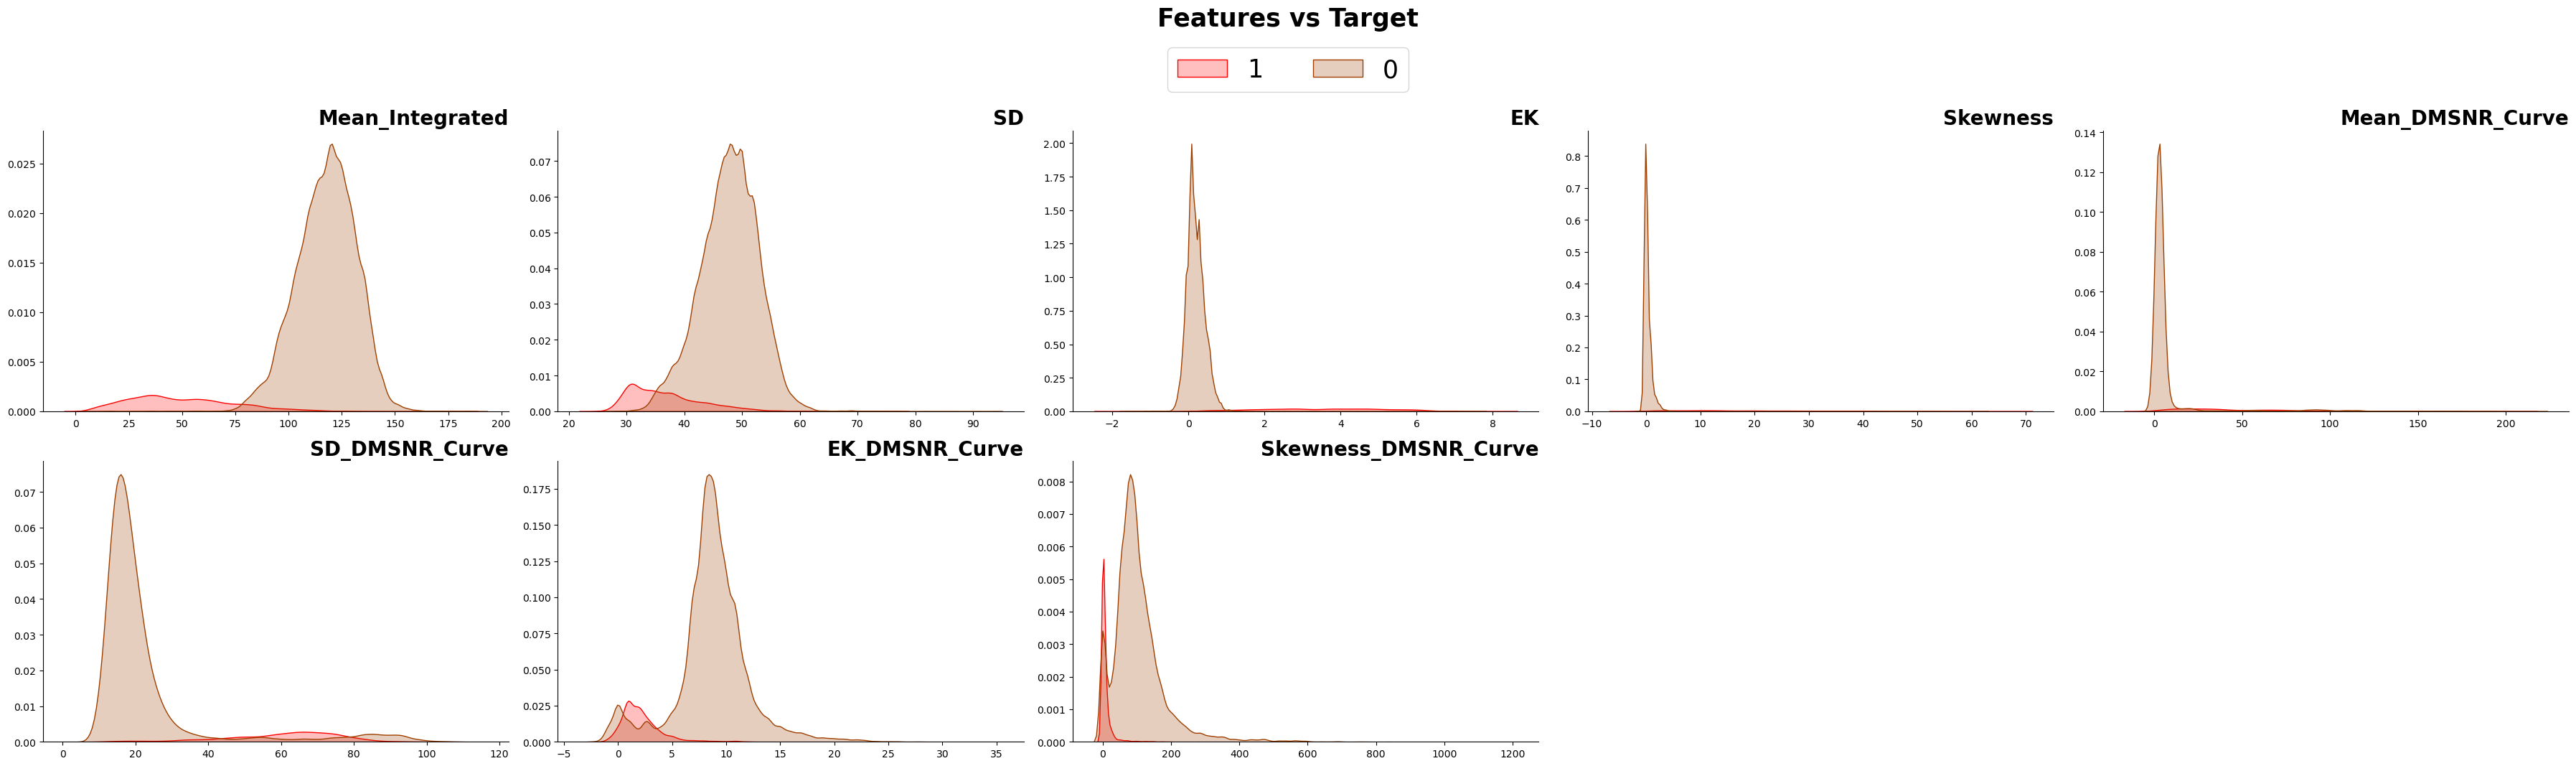

CPU times: user 9.41 s, sys: 3.16 s, total: 12.6 s
Wall time: 7.63 s


In [ ]:
%%time
figsize = (6*6, 20)
fig = plt.figure(figsize=figsize)
for idx, col in enumerate(num_cols):
    ax = plt.subplot(4, 5, idx + 1)
    sns.kdeplot(
        data=train, hue='Class', fill=True,
        x=col, palette=['#9E3F00', 'red'], legend=False
    )

    ax.set_ylabel(''); ax.spines['top'].set_visible(False),
    ax.set_xlabel(''); ax.spines['right'].set_visible(False)
    ax.set_title(f'{col}', loc='right',
                 weight='bold', fontsize=20)

fig.suptitle(f'Features vs Target\n\n\n', ha='center',  fontweight='bold', fontsize=25)
fig.legend([1, 0], loc='upper center', bbox_to_anchor=(0.5, 0.96), fontsize=25, ncol=3)
plt.tight_layout()
plt.show()

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">

<h3 align="left"><font color='white'>💡 Insights:</font></h3>

* The distribution is different obviously, which means these variables have predictive power in some sense.
* Therefore, we are going to use all these variables without applying feature selection method.

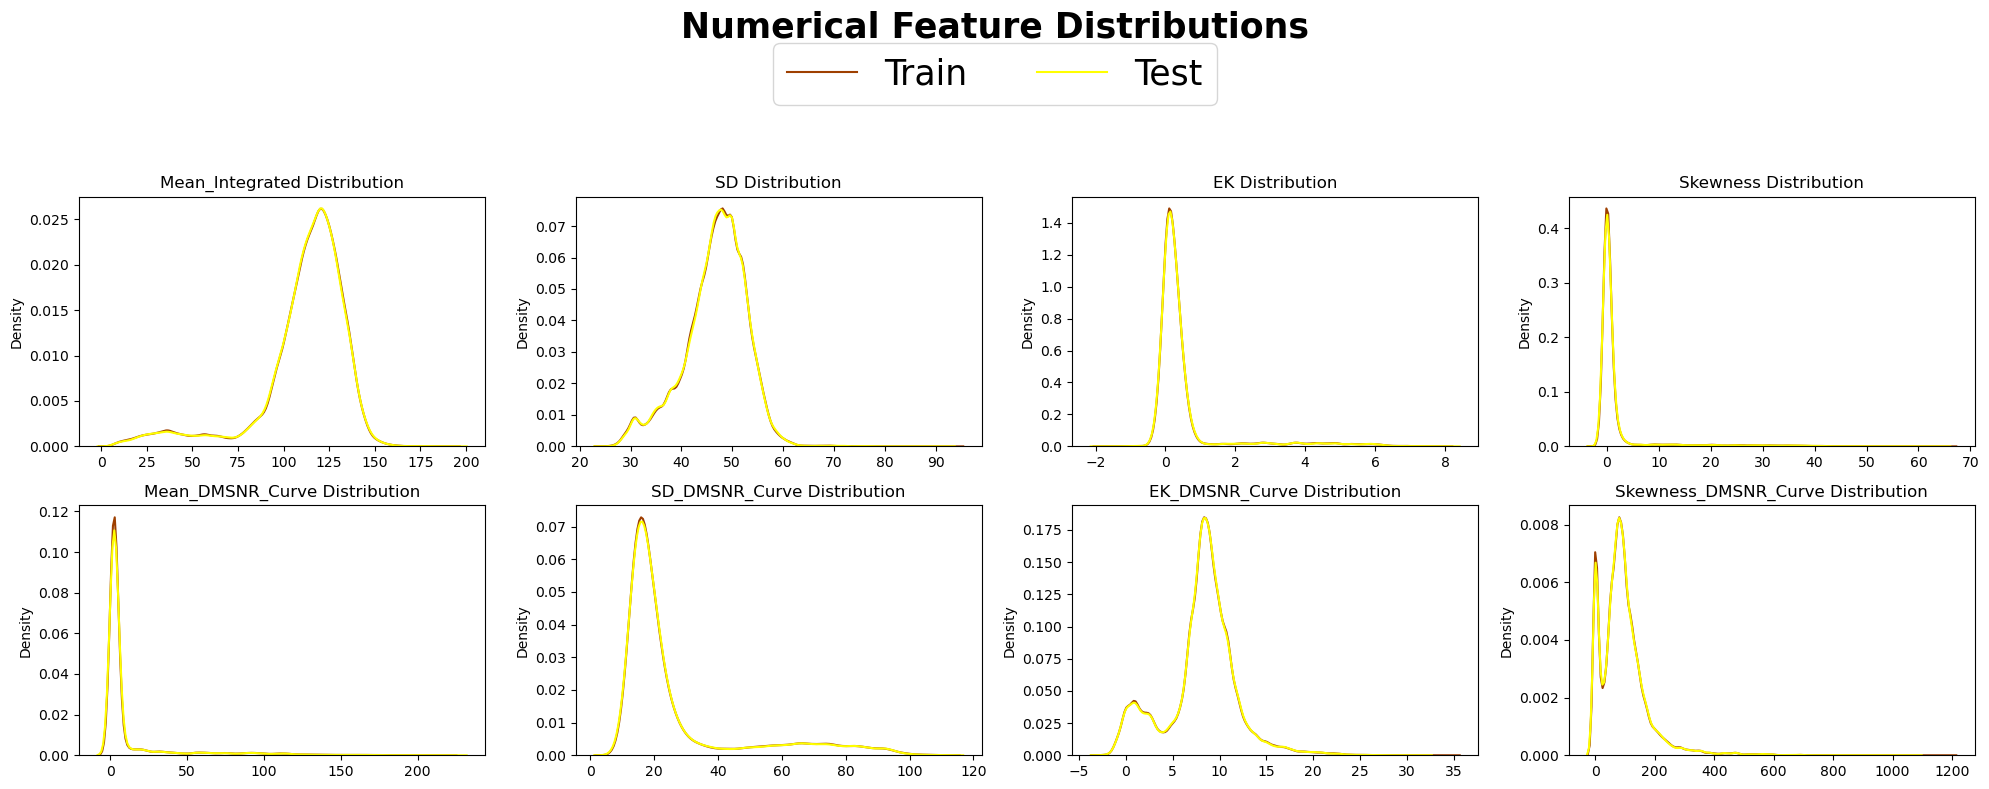

In [ ]:
features = num_cols
n_bins = 50
histplot_hyperparams = {
    'kde':True,
    'alpha':0.4,
    'stat':'percent',
    'bins':n_bins
}

columns = features
n_cols = 4
n_rows = math.ceil(len(columns)/n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))
ax = ax.flatten()

for i, column in enumerate(columns):
    plot_axes = [ax[i]]
    sns.kdeplot(
        train[column], label='Train',
        ax=ax[i], color='#9E3F00'
    )

    sns.kdeplot(
        test[column], label='Test',
        ax=ax[i], color='yellow'
    )


    # titles
    ax[i].set_title(f'{column} Distribution');
    ax[i].set_xlabel(None)

    # remove axes to show only one at the end
    plot_axes = [ax[i]]
    handles = []
    labels = []
    for plot_ax in plot_axes:
        handles += plot_ax.get_legend_handles_labels()[0]
        labels += plot_ax.get_legend_handles_labels()[1]
        plot_ax.legend().remove()

for i in range(i+1, len(ax)):
    ax[i].axis('off')

fig.suptitle(f'Numerical Feature Distributions\n\n\n', ha='center',  fontweight='bold', fontsize=25)
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.96), fontsize=25, ncol=3)
plt.tight_layout()

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">

<h3 align="left"><font color='white'>💡 Insights:</font></h3>
* The distribution between train and test dataset is almost same.

<a id="4"></a>
## <b>4 <span style='color:red'>Correlation</span></b>


<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
Data correlation is the way in which one set of data may correspond to another set. In ML, think of how your features correspond with your output.

One cannot use linear regression to model a nonlinear dataset. The opposite is also true. If you have a linear correlated dataset you need a simple model like linear regression. Even the best CNN will give you a poor result.

Thus, it becomes very hard to figure out how data correlates if you have more than two features. Data visualization can help find how individual features may correlate with the output.

We have plotted a heat map to check how the attributes are related to each other.


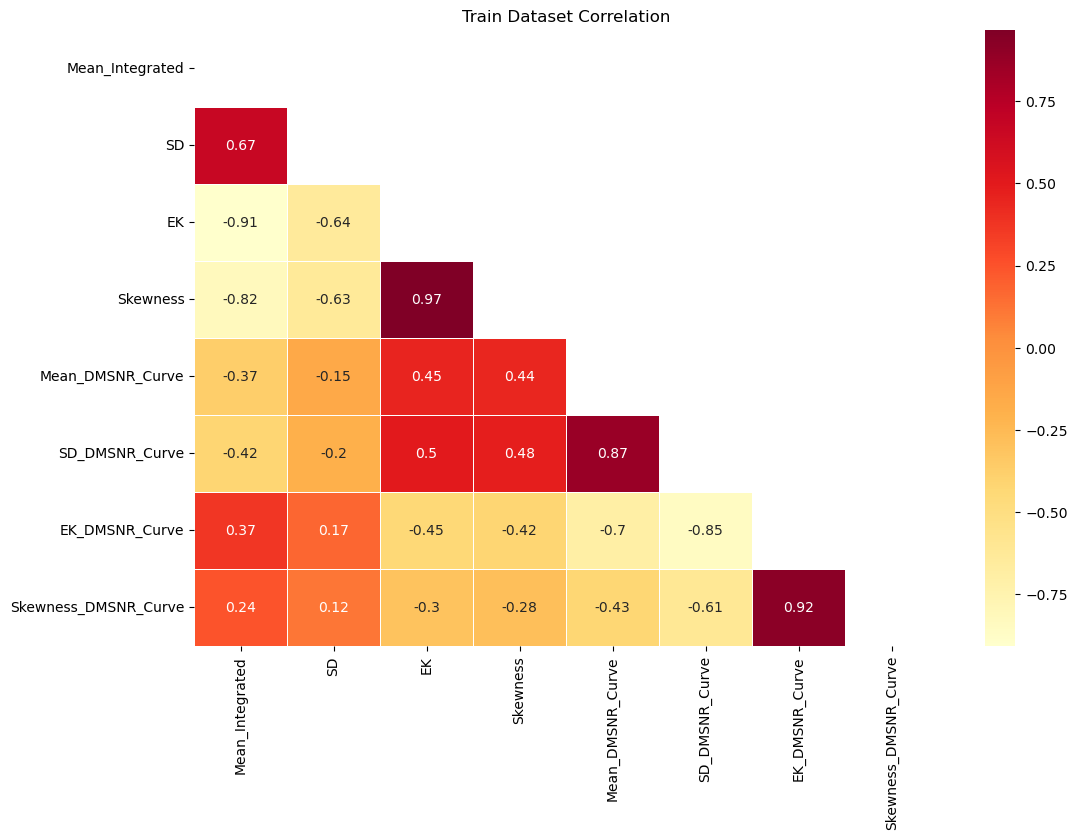

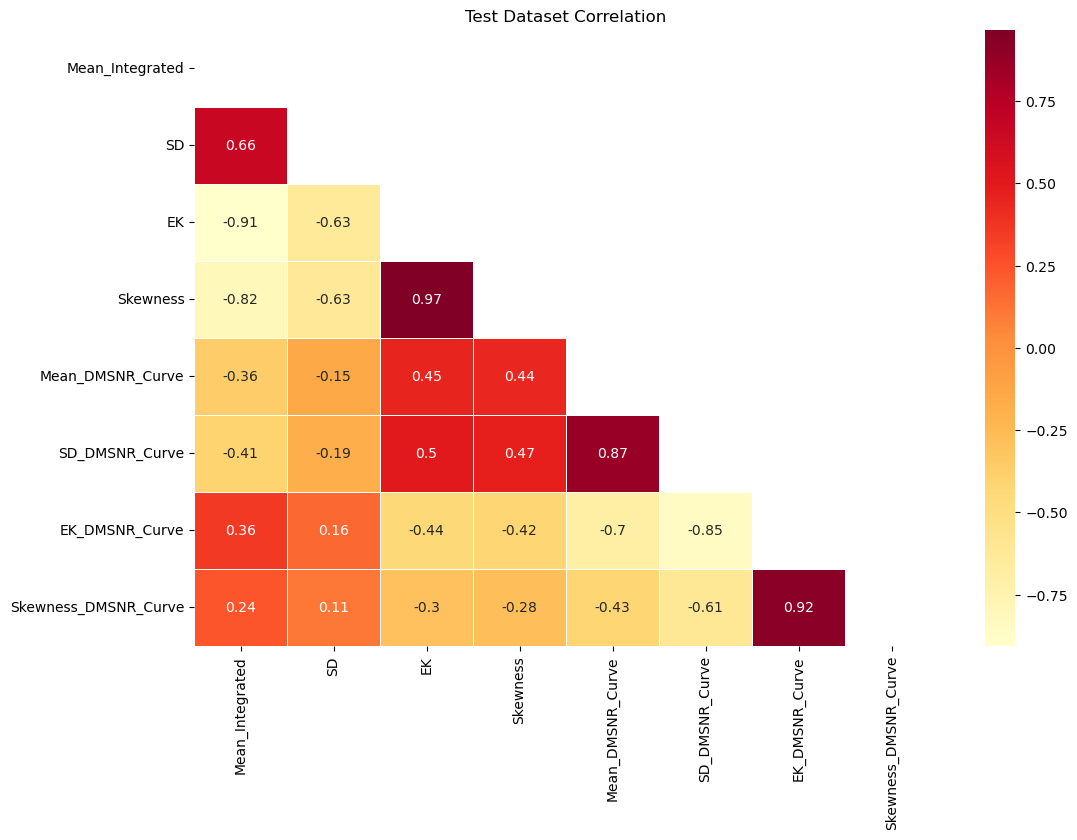

In [ ]:
def plot_correlation_heatmap(df: pd.core.frame.DataFrame, title_name: str='Train correlation') -> None:
    corr = df.corr()
    fig, axes = plt.subplots(figsize=(12, 8))
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr, mask=mask, linewidths=.5, cmap='YlOrRd', annot=True)
    plt.title(title_name)
    plt.show()

plot_correlation_heatmap(train[num_cols], 'Train Dataset Correlation')
plot_correlation_heatmap(test[num_cols], 'Test Dataset Correlation')

<a id="5"></a>
## <b>5 <span style='color:red'>Model building</span></b>

<div class="alert alert-block alert-success" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Modeling overview:</u></b><br>
    
* <i> build baseline model without hyperparameter tuning</i><br>
* <i> 5-fold cross validation methods are used for baseline modeling.</i><br>
* <i> metric is binary_logloss</i><br>
  
</div>

In [ ]:
TARGET = 'Class'
FEATURES = num_cols

# lgb model

In [ ]:
FOLDS=5

lgb_params = {
    'objective' : 'binary',
    'metric' : 'binary_logloss',
    'learning_rate': 0.0021,
    'max_depth': 5,
    'num_iterations': 1500,
    'feature_fraction': 0.824727327666877,
    'bagging_fraction': 0.584271177810496
}


lgb_predictions = 0
lgb_scores = []
lgb_imp = []

skf = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=1004)
for fold, (train_idx, valid_idx) in enumerate(skf.split(train[FEATURES], train[TARGET])):

    print(10*"=", f"Fold={fold+1}", 10*"=")
    start_time = time.time()

    X_train, X_valid = train.iloc[train_idx][FEATURES], train.iloc[valid_idx][FEATURES]
    y_train , y_valid = train[TARGET].iloc[train_idx] , train[TARGET].iloc[valid_idx]

    model = LGBMClassifier(**lgb_params)
    model.fit(X_train, y_train,verbose=0)

    preds_valid = model.predict_proba(X_valid)[:, 1]
    auc = roc_auc_score(y_valid,  preds_valid)
    lgb_scores.append(auc)
    run_time = time.time() - start_time

    print(f"Fold={fold+1}, AUC score: {auc:.2f}, Run Time: {run_time:.2f}s")
    fim = pd.DataFrame(index=FEATURES,
                 data=model.feature_importances_,
                 columns=[f'{fold}_importance'])
    lgb_imp.append(fim)
    test_preds = model.predict_proba(test[FEATURES])[:, 1]
    lgb_predictions += test_preds/FOLDS

print("Mean AUC :", np.mean(lgb_scores))

========== Fold=1 ==========
[LightGBM] [Warning] feature_fraction is set=0.824727327666877, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.824727327666877
[LightGBM] [Warning] bagging_fraction is set=0.584271177810496, subsample=1.0 will be ignored. Current value: bagging_fraction=0.584271177810496
Fold=1, AUC score: 0.99, Run Time: 17.45s
========== Fold=2 ==========
[LightGBM] [Warning] feature_fraction is set=0.824727327666877, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.824727327666877
[LightGBM] [Warning] bagging_fraction is set=0.584271177810496, subsample=1.0 will be ignored. Current value: bagging_fraction=0.584271177810496
Fold=2, AUC score: 1.00, Run Time: 16.23s
========== Fold=3 ==========
[LightGBM] [Warning] feature_fraction is set=0.824727327666877, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.824727327666877
[LightGBM] [Warning] bagging_fraction is set=0.584271177810496, subsample=1.0 will 

# RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(random_state=13)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_valid)

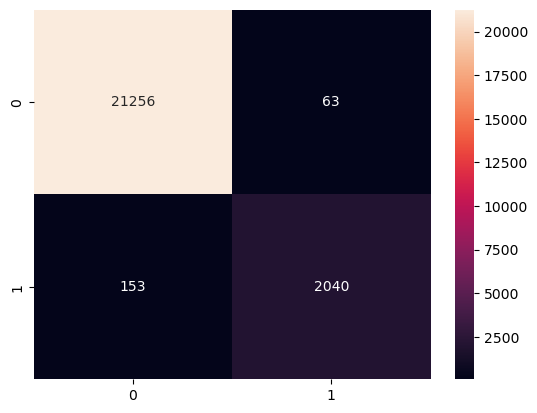

In [ ]:
rf_Recall = recall_score(y_valid, y_pred)
rf_Precision = precision_score(y_valid, y_pred)
rf_f1 = f1_score(y_valid, y_pred)
rf_accuracy = accuracy_score(y_valid, y_pred)
rf_roc_auc = roc_auc_score(y_valid, y_pred)

## confusion matrix
conf_mat = metrics.confusion_matrix(y_valid, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

In [ ]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     21319
           1       0.97      0.93      0.95      2193

    accuracy                           0.99     23512
   macro avg       0.98      0.96      0.97     23512
weighted avg       0.99      0.99      0.99     23512



# XGBClassifier

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     21319
           1       0.97      0.94      0.95      2193

    accuracy                           0.99     23512
   macro avg       0.98      0.97      0.97     23512
weighted avg       0.99      0.99      0.99     23512

Model accuracy: 0.9912810479755019


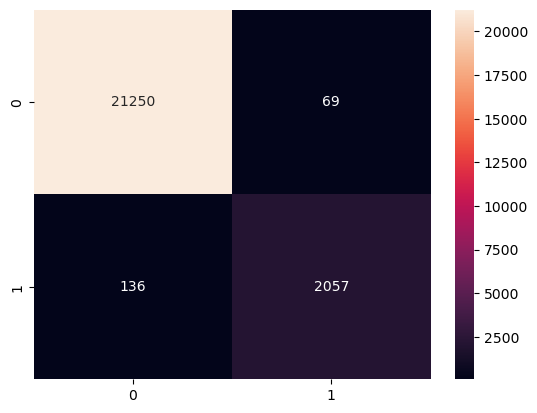

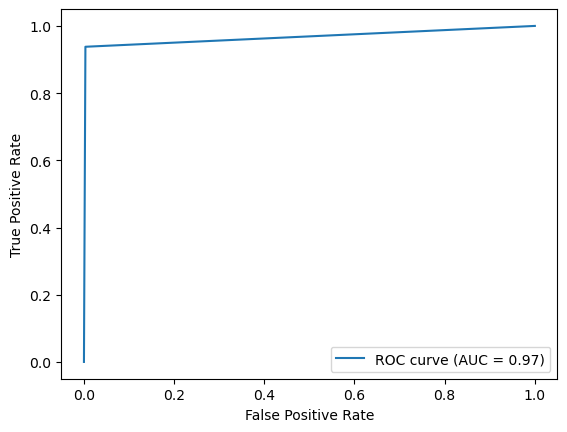

In [ ]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_valid)
print(classification_report(y_valid, y_pred))
print("Model accuracy:", accuracy_score(y_valid,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_valid, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_valid, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

# LGBMClassifier

In [ ]:
import lightgbm as lgb
model = lgb.LGBMClassifier()  #lgb.LGBMClassifier()
model.fit(X_train,y_train)
y_predll=model.predict(X_valid)
accuracy_score(y_predll,y_valid)

0.9907706702960191

In [ ]:
FOLD = 10

from sklearn.model_selection import cross_val_score
print("Cross-Validation Score :",cross_val_score(model, X_valid, y_valid, cv=FOLD,scoring='accuracy').mean())

Cross-Validation Score : 0.9906431660286403


<a id="6"></a>
## <b>6 <span style='color:red'>Submitting</span></b>

In [ ]:
test.drop('id',axis=1,inplace=True)
pred = rf.predict(test)

In [ ]:
sample

,id,Class
0,117564,0.5
1,117565,0.5
2,117566,0.5
3,117567,0.5
4,117568,0.5
...,...,...
78372,195936,0.5
78373,195937,0.5
78374,195938,0.5
78375,195939,0.5


In [ ]:
sample['Class']=test_preds
sample

,id,Class
0,117564,0.004158
1,117565,0.004411
2,117566,0.004158
3,117567,0.049477
4,117568,0.007771
...,...,...
78372,195936,0.004386
78373,195937,0.004158
78374,195938,0.004158
78375,195939,0.072552


In [ ]:
sample.to_csv('sub.csv',index=False)